## A010

María Fernanda Muñoz Sevilla

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
df = pd.read_excel("C:/Users/munoz/Downloads/lab_apre_est/Motor Trend Car Road Tests.xlsx")

X = df[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']]
y = df['mpg']


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

### Prueba de normalidad

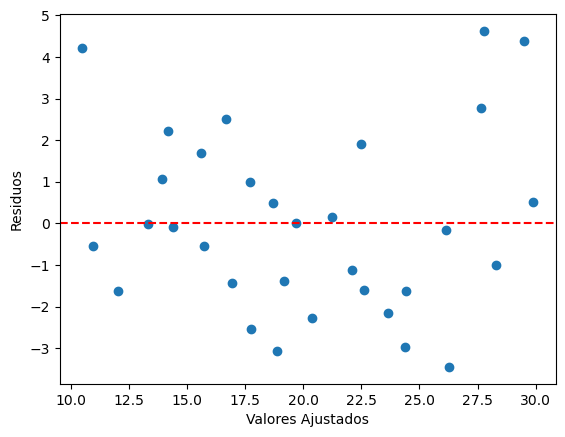

In [8]:
# Gráfico de Residuos vs Valores Ajustados
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

Se ve una mejor distribución de los puntos, no una figura

### Prueba 2 Correlación en errores

In [16]:
# Test de Durbin-Watson
dw_valor = sm.stats.durbin_watson(model.resid)
print("Durbin-Watson: ",dw_valor)
print("Meta: Estar cerca de 2.0")

Durbin-Watson:  1.8608933684548237
Meta: Estar cerca de 2.0


### Prueba 3. Varianza no constante en errores

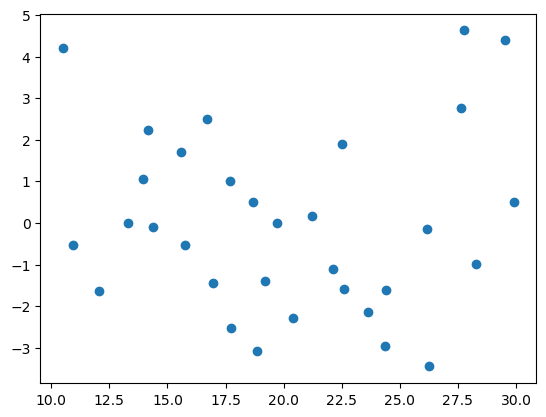

In [19]:
# Gráfico simple de residuos
plt.scatter(model.fittedvalues, model.resid)
plt.show()

Esto se afigura que es homocedástica

### Prueba 4. Outliers

In [23]:
# Residuos Estudentizados
outliers = model.get_influence().resid_studentized_external
print("Outliers detectados:", outliers[abs(outliers) > 3])

Outliers detectados: []


No hay outliers

### Prueba 5. Puntos palanca

In [28]:
# Calcular Leverage
influence = model.get_influence()
leverage = influence.hat_matrix_diag
umbral = 2 * (len(X.columns) / len(df))

print("Puntos palanca:", leverage[leverage > umbral])

Puntos palanca: [0.74228696]


Solo tenemos un punto palanca

### 6. Colinealidad

In [33]:
# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

   Variable          VIF
0     const  1596.273030
1       cyl    15.373833
2      disp    21.620241
3        hp     9.832037
4      drat     3.374620
5        wt    15.164887
6      qsec     7.527958
7        vs     4.965873
8        am     4.648487
9      gear     5.357452
10     carb     7.908747


Cyl y Disp, son los que tienen el VIF mayor a 10, entonces si hay colinealidad con ellos